In [244]:
import pandas as pd
import numpy as np
import json
from collections import defaultdict
import copy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from hotpot_evaluate_v1 import f1_score, exact_match_score

In [275]:
with open('data/hotpot/hotpot_dev_distractor_v1.json') as json_data:
    orig = json.load(json_data)

with open('../../fullwiki_topcontext.json') as json_data:
    top1_orig = json.load(json_data)
    
with open('../../fullwiki_top3context.json') as json_data:
    top3_orig = json.load(json_data)
    
with open('../../fullwiki_top6context.json') as json_data:
    top6_orig = json.load(json_data)
    
with open('../../fullwiki_allcontext.json') as json_data:
    all_orig = json.load(json_data)

In [276]:
orig[1]

{'_id': '5a8c7595554299585d9e36b6',
 'answer': 'Chief of Protocol',
 'question': 'What government position was held by the woman who portrayed Corliss Archer in the film Kiss and Tell?',
 'supporting_facts': [['Kiss and Tell (1945 film)', 0],
  ['Shirley Temple', 0],
  ['Shirley Temple', 1]],
 'context': [['Meet Corliss Archer',
   ["Meet Corliss Archer, a program from radio's Golden Age, ran from January 7, 1943 to September 30, 1956.",
    ' Although it was CBS\'s answer to NBC\'s popular "A Date with Judy", it was also broadcast by NBC in 1948 as a summer replacement for "The Bob Hope Show".',
    ' From October 3, 1952 to June 26, 1953, it aired on ABC, finally returning to CBS.',
    " Despite the program's long run, fewer than 24 episodes are known to exist."]],
  ['Shirley Temple',
   ["Shirley Temple Black (April 23, 1928 – February 10, 2014) was an American actress, singer, dancer, businesswoman, and diplomat who was Hollywood's number one box-office draw as a child actress fr

In [173]:
top1_orig[1]

{'_id': '5a8c7595554299585d9e36b6',
 'context': [['Kiss and Tell (1945 film)',
   ['Kiss and Tell is a 1945 American comedy film starring then 17-year-old Shirley Temple as Corliss Archer.',
    'In the film, two teenage girls cause their respective parents much concern when they start to become interested in boys.',
    "The parents' bickering about which girl is the worse influence causes more problems than it solves.."]],
  ['Shirley Temple',
   ["Shirley Temple Black (April 23, 1928\xa0– February 10, 2014) was an American actress, singer, dancer, businesswoman, and diplomat who was Hollywood's number one box-office draw as a child actress from 1935 to 1938.",
    'As an adult, she was named United States ambassador to Ghana and to Czechoslovakia and also served as Chief of Protocol of the United States..']]],
 'supporting_facts': [['Kiss and Tell (1945 film)', 0],
  ['Shirley Temple', 0],
  ['Shirley Temple', 1]],
 'answer': 'Chief of Protocol',
 'type': 'bridge',
 'level': 'hard',

In [199]:
top3_orig[1]

{'_id': '5a8c7595554299585d9e36b6',
 'context': [['Kiss and Tell (1945 film)',
   ['Kiss and Tell is a 1945 American comedy film starring then 17-year-old Shirley Temple as Corliss Archer.',
    'In the film, two teenage girls cause their respective parents much concern when they start to become interested in boys.',
    "The parents' bickering about which girl is the worse influence causes more problems than it solves.."]],
  ['Shirley Temple',
   ["Shirley Temple Black (April 23, 1928\xa0– February 10, 2014) was an American actress, singer, dancer, businesswoman, and diplomat who was Hollywood's number one box-office draw as a child actress from 1935 to 1938.",
    'As an adult, she was named United States ambassador to Ghana and to Czechoslovakia and also served as Chief of Protocol of the United States..']],
  ['A Kiss for Corliss',
   ['A Kiss for Corliss is a 1949 American comedy film directed by Richard Wallace and written by Howard Dimsdale.',
    'It stars Shirley Temple in he

In [175]:
top6_orig[1]

{'_id': '5a8c7595554299585d9e36b6',
 'context': [['Kiss and Tell (1945 film)',
   ['Kiss and Tell is a 1945 American comedy film starring then 17-year-old Shirley Temple as Corliss Archer.',
    'In the film, two teenage girls cause their respective parents much concern when they start to become interested in boys.',
    "The parents' bickering about which girl is the worse influence causes more problems than it solves.."]],
  ['Shirley Temple',
   ["Shirley Temple Black (April 23, 1928\xa0– February 10, 2014) was an American actress, singer, dancer, businesswoman, and diplomat who was Hollywood's number one box-office draw as a child actress from 1935 to 1938.",
    'As an adult, she was named United States ambassador to Ghana and to Czechoslovakia and also served as Chief of Protocol of the United States..']],
  ['A Kiss for Corliss',
   ['A Kiss for Corliss is a 1949 American comedy film directed by Richard Wallace and written by Howard Dimsdale.',
    'It stars Shirley Temple in he

In [236]:
all_orig[1]['answer']

'Chief of Protocol'

In [206]:
with open('out/decom-bridge/dev_predictions.json') as json_data:
    bridging_pred = json.load(json_data)
with open('out/decom-intersec/dev_predictions.json') as json_data:
    intersec_pred = json.load(json_data)
    
with open('out/scorer/dev_class_scores-orig.json') as json_data:
    scores_orig = json.load(json_data)
with open('out/scorer/dev_final_class_scores-orig.json') as json_data:
    final_scores_orig = json.load(json_data)

    
with open('out/scorer/top1_dev_class_scores.json') as json_data:
    scores_top1 = json.load(json_data)
with open('out/scorer/top1_reasoning_paths_scores.json') as json_data:
    final_scores_top1 = json.load(json_data)
    
with open('out/scorer/top3_dev_class_scores.json') as json_data:
    scores_top3 = json.load(json_data)
with open('out/scorer/top3_reasoning_paths_scores.json') as json_data:
    final_scores_top3 = json.load(json_data)
    
with open('out/scorer/top6_dev_class_scores.json') as json_data:
    scores_top6 = json.load(json_data)
with open('out/scorer/top6_reasoning_paths_scores.json') as json_data:
    final_scores_top6 = json.load(json_data)
    
with open('out/scorer/all_reasoning_paths_scores.json') as json_data:
    final_scores_all = json.load(json_data)

In [180]:
scores_orig['5abd94525542992ac4f382d2']

[[0.9967542292688008,
  1.0,
  0,
  '2014 S/S is the debut album of a South Korean boy group that was formed by who? (bridge) yg entertainment'],
 [9.583921530889673e-05,
  0,
  1,
  '2014 S/S is the debut album of a South Korean boy group that was formed by who? (intersec) winner'],
 [0.012785805537998629,
  0,
  2,
  '2014 S/S is the debut album of a South Korean boy group that was formed by who? (onehop) j. tune camp']]

In [183]:
scores_top6['5abd94525542992ac4f382d2']

[[0.9990649946511851,
  0.5,
  0,
  '2014 S/S is the debut album of a South Korean boy group that was formed by who? (bridge) s.m. entertainment'],
 [0.99962764302584,
  1.0,
  1,
  '2014 S/S is the debut album of a South Korean boy group that was formed by who? (intersec) yg entertainment'],
 [0.9999314265353542,
  1.0,
  2,
  '2014 S/S is the debut album of a South Korean boy group that was formed by who? (onehop) yg entertainment']]

In [184]:
final_scores_orig['answer']['5abd94525542992ac4f382d2']

['yg entertainment', 'bridge']

In [164]:
scores_top1['5abd94525542992ac4f382d2']

[[0.9999622270615575,
  1.0,
  0,
  '2014 S/S is the debut album of a South Korean boy group that was formed by who? (bridge) yg entertainment'],
 [3.534502471127566e-05,
  0,
  1,
  '2014 S/S is the debut album of a South Korean boy group that was formed by who? (intersec) big bang'],
 [0.9999314260449105,
  1.0,
  2,
  '2014 S/S is the debut album of a South Korean boy group that was formed by who? (onehop) yg entertainment']]

In [165]:
final_scores_top1['answer']['5a85b2d95542997b5ce40028']

['eenasul fateh', 'intersec']

In [207]:
all_pred = copy.deepcopy(all_orig)
for i in range(len(all_orig)):
    out = final_scores_all['answer'][all_orig[i]['_id']]
    reason = out[1]
    answer = out[0]
    all_pred[i]['answer'] = answer
    ground_truth_answer = all_orig[i]['answer']
    if answer != ground_truth_answer.lower():
        print(i)
        print(ground_truth_answer)
        print(answer)

with open('../../fullwiki_allcontext_predictions.json', 'w') as json_data:
    json.dump(all_pred, json_data)

1
Chief of Protocol
united states ambassador
4
Greenwich Village, New York City
greenwich village
7
3,677 seated
3,677
9
yes
no
10
Kansas Song
i'm a jayhawk
11
David Weissman
david diamond
15
9,984
3,172
16
the North Atlantic Conference
north atlantic conference
18
1969 until 1974
1953 to 1961
19
Robert Erskine Childers DSC
robert erskine childers
20
Pedro Rodríguez
sergio pérez
21
Sonic
sonic the hedgehog
22
keyboard function keys
isight imac g5
23
Badly Drawn Boy
wolf alice
24
World's Best Goalkeeper
manager of the year
25
Barton Lee Hazlewood
lee hazlewood
27
yes
no
29
Arena of Khazan
wasteland
30
2000
march 14, 2000
31
Fujioka, Gunma
thornhill, ontario
32
Charles Eugène
charles eugène jules marie nungesser
35
October 1922
1923
37
World War II
world war i
39
New York City
upper manhattan, new york city
40
Scotch Collie
manchester terrier
41
Mumbai
mumbai, maharashtra
43
sovereignty
ethiopian sovereignty
45
Yellowcraig
firth of forth
47
Organizations could come together to address gl

Aubrey Posen
sarah newlin
1266
London
united kingdom
1267
Boston
boston, massachusetts
1271
BC Dzūkija
dzūkija alytus
1272
Syracuse University.
syracuse university
1273
Nusretiye Mosque
nusretiye
1274
Jim Pugh
richard gasquet
1275
Gregory John "Greg" Puciato
greg puciato
1278
Nikolai Ivanovich Lobachevsky
leonid khachiyan
1279
Adam Dawes
takashi yoshimatsu
1281
2011
2012
1282
The Los Angeles Dance Theater
new york city ballet
1284
nine girls and 10 boys
sixteen of their seventeen siblings
1285
three million copies worldwide
three million
1286
Miami Gardens, Florida,
miami gardens
1287
Double Crossed
feargal sharkey
1288
Melanie Owen
melanie jane "mel" owen
1289
the world
private equity
1292
Drunter und Drüber is a multiplayer board game invented by Klaus Teuber
no
1293
Umaro Mokhtar Sissoco Embaló
roch marc christian kaboré
1295
Volta
volta region of ghana
1296
Otto Eduard Leopold
otto von bismarck
1299
Autopia
disneyland park
1300
Robert "Rob" Parissi
rob parissi
1301
Chuck E. Cheese'

Ricardo “El Finito” López Nava
ricardo lópez
2217
The Bharat Ratna
bharat ratna
2218
Malayalam
malayalam cinema
2220
Apple
apple inc.
2223
Sony Studio Liverpool
evolution studios
2224
Kevin Elliot Pollak
warwick davis, val kilmer
2225
Stanley Lloyd Kaufman, Jr.
lloyd kaufman
2230
Donald Sterling
sterling
2232
Lions for Lambs
"lions for lambs"
2234
Battle of Agincourt (1415)
battle of agincourt
2236
Bridgetown
houston, texas
2237
Who's That Girl
chastity
2238
Province of Canterbury
canterbury
2240
MI6
secret intelligence service
2243
10
four
2244
Centers for Medicare and Medicaid Services
northcoast 99
2246
12+3/4 mi northeast of Liverpool
12+3/4 mi
2247
Les Miles
leslie edwin miles
2251
Volvo 850
850 saloon
2252
Amon Leopold Göth
amon göth
2255
Brent Burns
william brent burns
2258
American
mexican
2260
Naval Weapons Station Yorktown
yorktown
2264
a British children's television series
american-canadian children's books
2265
in 1877
1865
2267
Robert Oliver Reed
oliver reed
2268
STS-51-L

"Billy" Corgan
jeff martin
3391
Mehran University of Engineering and Technology
mehran engineering and technology
3393
drummer
songwriter
3394
Mary
kavala
3399
Kenneth William "Ken" Kwapis
jon paul puno
3400
emotionally troubled women
marian wyman
3403
Dougray Scott
rob riggle
3405
Nigel John Dermot Neill
jon voight
3406
Thomas Robsahm
keith redmon
3407
July 14, 2009
15th
3408
director
film director
3411
Mark Dayton
chris christie
3413
Alfonso Cuarón
kevin smith
3417
ESPN
cbs
3418
Knowlton Hall
knowlton school
3421
genus of plants
genus
3422
Finland national football team
new york knicks
3423
horror film
south korean horror film
3425
Midland, Michigan, United States
midland, michigan
3426
yes
no
3429
Melbourne, Victoria, Australia
melbourne
3431
The Spring 1945 offensive in Italy
spring 1945 offensive in italy
3432
The song also features rap parts from Darryl, RB Djan and Ryan Babel.
song by ajax and friends
3433
Martin Scorsese
terence winter
3434
2013
2003
3436
"Kitty Hawk"
stormy
34

4575
Walldorf
walldorf, baden-württemberg
4576
The Devil Came on Horseback
my best fiend
4579
1965
1968
4580
represented District 65
district 65
4581
Washington, D.C.
freiburg
4583
born 21 August 1986
14 october 1977
4584
Selina D'Arcy
selina
4587
seven members
10
4590
Sizzurp
cough syrup
4591
Veyyil
thamizhan
4592
five times,
five
4595
2010
2013
4598
yes
no
4600
over 30 million
over 80 million
4601
is a 2016 science fiction psychological horror
psychological horror
4602
McDonnell Douglas
mcdonnell douglas (now boeing
4603
John Schlesinger
hoffman
4604
The Oregon Ducks
oregon ducks
4605
Commissioner
executive chairman
4607
Goodbye Mr Mackenzie
chvrches
4608
Carleton University
carleton
4609
around 8000 BC
8000 bc
4611
Germany
brown county, illinois, united states
4612
genus
flowering plants
4613
Ochre Point Avenue
newport county, rhode island, united states
4614
Fort Valley, Georgia
peach county, georgia
4616
English Mastiff
griffon bruxellois
4617
Vivendi S.A.
vivendi
4621
St. Elizabe

City and County of Honolulu
costa mesa, california
5760
Dutch
italian
5761
Luger P08
colt m1911a1 pistol
5768
the Qin dynasty
qin dynasty
5769
"Invader (Invasor)"
invader (invasor)
5771
Wildhorn, Bricusse and Cuden
lin-manuel miranda
5772
Dain Rauscher Wessels
berenberg bank
5773
All That
beat shazam
5774
Scottish
american
5775
Taylor Swift
taylor alison swift
5778
Conservative
british conservative party
5781
Switzerland
romania
5783
Julius Caesar "J. C." Watts Jr.
oklahoma sooners
5786
Mercury Seven
luna 17
5790
MedStar Washington Hospital Center
medstar washington hospital
5791
Wake Atoll
rosario island
5794
Australian
american
5797
primarily in Culver City and Marina del Rey
culver city and marina del rey
5798
Laysan
oahu
5800
sedan and station wagon
ford fg x falcon
5801
Cecily Strong
ashley michele greene
5802
Singapore Airlines Limited
singapore airlines
5805
Mensch ärgere Dich nicht
roulette
5806
78.5 mi long
78.5
5808
"Ain't Got Nothin' on Us"
i swear", "be my baby tonight
5809

nursery rhyme
6707
Benjamin Banneker
washington, d.c.
6708
on iTunes.
itunes
6709
La mamma morta
ubu roi
6713
Jason Emanuel Gould
andrea bocelli
6715
Christopher Guest
elem klimov
6716
cocktails
cocktail
6717
Mr. Smithers
g-g-ghost d-d-dad
6718
Long Island
fire island
6721
Plies
fat joe
6723
Eurasia
east asia
6724
Donatos
frank pepe pizzeria napoletana
6727
Boston, Massachusetts
mooresville, nc
6729
Betsy Ross
betsy ross flag
6730
Fort Hood, Texas
pohang
6736
won an Academy Award
academy award
6742
John Kingsley "Joe" Orton
joe orton
6743
672 km2
672
6745
Muir
mike muir
6746
Chicago, Illinois
neues schauspielhaus, berlin
6748
Graham County, Kansas
blaine county
6749
an American football quarterback
quarterback
6751
The Dundee Canal
dundee canal
6753
June 2007
october
6754
1927
1901
6755
Little Boy
"fat man"
6756
2008
2008 presidential election
6757
E Street Band
bruce springsteen band
6758
Charles L. Clifford
emily brontë
6759
Queen Mathilde
queen paola
6760
2014
1971
6761
1692
24 dece

pitch and sight singing of western music
7337
Tak and the Power of Juju
the hobbit
7340
Nashville
nashville, tennessee
7341
Christian
jewish
7342
Julia Verdin
ethan hawke
7343
the Food and Agriculture Organization
food and agriculture organization
7344
Claudio Javier López
pablo aimar
7348
Walker
alice walker
7350
the outdoors
the outdoors, especially mountain-climbing
7351
Manchester
balloon street, manchester
7354
Gulfport, Biloxi
booneville
7356
five
four
7359
Watertown, New York
chicago, illinois
7360
Alain Robbe-Grillet.
film
7361
70 years
english-australian film and stage actor
7362
Athenion
abdallah al-khazin
7364
1927
1944
7365
Robert Louis Fosse
angelina jolie
7367
Lin-Manuel Miranda
ryan murphy
7368
Rio Gavin Ferdinand
rio gavin ferdin
7369
Edison Koon-hei Chen
edison chen
7370
Gareth Huw Evans
gareth evans
7371
Morning glory
rothmannia
7372
from around 1520
1520
7375
Goldie & Bear
sony pictures animation
7376
Tomasz Adamek
yuri foreman
7378
Chevrolet Corvette Stingrays
chevr

In [283]:
large_bar_f1 = defaultdict(lambda: defaultdict(list))


large_bar_em = defaultdict(lambda: defaultdict(list))


def f1(pred, a):
    return f1_score(pred, a)[0]

def em(pred, a):
    return exact_match_score(pred, a)

## Confusion Matrix for categories

### Orig Context

Percent of Questions predicted One Hop: 28.86
Percent of Intersec Questions that are Bridge: 98.41


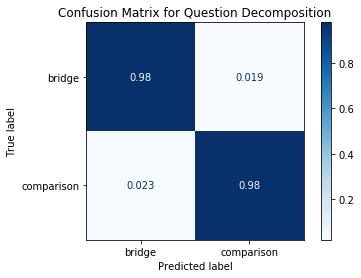

In [284]:
cat_truth = []
cat_pred = []
onehop_count = 0
intersec_count = 0
intersec_bridge = 0
count = len(orig)
for i in range(len(orig)):
    out = final_scores_orig['answer'][orig[i]['_id']]
    reason = out[1]
    answer = out[0]
    ground_truth_answer = orig[i]['answer']
    ground_truth_reasoning = orig[i]['type']
    large_bar_f1[reason]['Orig'].append(f1(answer,ground_truth_answer))
    large_bar_em[reason]['Orig'].append(em(answer,ground_truth_answer))
    if reason == 'onehop':
        onehop_count += 1
    else:
        cat_truth.append(ground_truth_reasoning)
        if reason == 'intersec':
            cat_pred.append('bridge')
            intersec_count += 1
            if ground_truth_reasoning == 'bridge':
                intersec_bridge += 1  
        else:
            cat_pred.append(reason)

print("Percent of Questions predicted One Hop: {:.2f}".format(onehop_count * 100 / count))
print("Percent of Intersec Questions that are Bridge: {:.2f}".format(intersec_bridge * 100 / intersec_count))
conf = confusion_matrix(cat_truth, cat_pred, normalize = 'true')
disp = ConfusionMatrixDisplay(conf, ['bridge', 'comparison'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Question Decomposition')
plt.show()

### All Context

Percent of Questions predicted One Hop: 27.93
Percent of Intersec Questions that are Bridge: 98.43


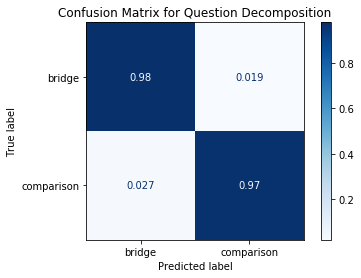

In [285]:
cat_truth = []
cat_pred = []
onehop_count = 0
intersec_count = 0
intersec_bridge = 0
count = len(all_orig)
for i in range(len(all_orig)):
    out = final_scores_all['answer'][all_orig[i]['_id']]
    reason = out[1]
    answer = out[0]
    ground_truth_answer = all_orig[i]['answer']
    ground_truth_reasoning = all_orig[i]['type']
    large_bar_f1[reason]['All'].append(f1(answer,ground_truth_answer))
    large_bar_em[reason]['All'].append(em(answer,ground_truth_answer))
    if reason == 'onehop':
        onehop_count += 1
    else:
        cat_truth.append(ground_truth_reasoning)
        if reason == 'intersec':
            cat_pred.append('bridge')
            intersec_count += 1
            if ground_truth_reasoning == 'bridge':
                intersec_bridge += 1  
        else:
            cat_pred.append(reason)

print("Percent of Questions predicted One Hop: {:.2f}".format(onehop_count * 100 / count))
print("Percent of Intersec Questions that are Bridge: {:.2f}".format(intersec_bridge * 100 / intersec_count))
conf = confusion_matrix(cat_truth, cat_pred, normalize = 'true')
disp = ConfusionMatrixDisplay(conf, ['bridge', 'comparison'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Question Decomposition')
plt.show()

### Top 1

Percent of Questions predicted One Hop: 24.05
Percent of Intersec Questions that are Bridge: 98.36


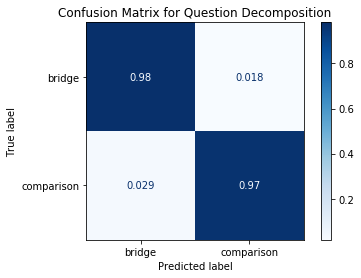

In [286]:
cat_truth = []
cat_pred = []
onehop_count = 0
intersec_count = 0
intersec_bridge = 0
count = len(top1_orig)
for i in range(len(top1_orig)):
    out = final_scores_top1['answer'][top1_orig[i]['_id']]
    reason = out[1]
    answer = out[0]
    ground_truth_answer = top1_orig[i]['answer']
    ground_truth_reasoning = top1_orig[i]['type']
    large_bar_f1[reason]['Top1'].append(f1(answer,ground_truth_answer))
    large_bar_em[reason]['Top1'].append(em(answer,ground_truth_answer))
    if reason == 'onehop':
        onehop_count += 1
    else:
        cat_truth.append(ground_truth_reasoning)
        if reason == 'intersec':
            cat_pred.append('bridge')
            intersec_count += 1
            if ground_truth_reasoning == 'bridge':
                intersec_bridge += 1
            
        else:
            cat_pred.append(reason)

print("Percent of Questions predicted One Hop: {:.2f}".format(onehop_count * 100 / count))
print("Percent of Intersec Questions that are Bridge: {:.2f}".format(intersec_bridge * 100 / intersec_count))
conf = confusion_matrix(cat_truth, cat_pred, normalize = 'true')
disp = ConfusionMatrixDisplay(conf, ['bridge', 'comparison'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Question Decomposition')
plt.show()

### Top 3

Percent of Questions predicted One Hop: 24.92
Percent of Intersec Questions that are Bridge: 98.41


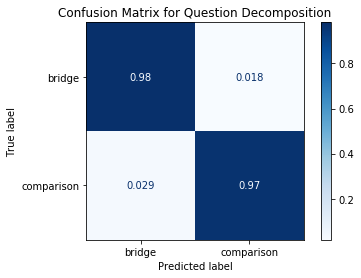

In [287]:
cat_truth = []
cat_pred = []
onehop_count = 0
intersec_count = 0
intersec_bridge = 0
count = len(top3_orig)
for i in range(count):
    out = final_scores_top3['answer'][top3_orig[i]['_id']]
    reason = out[1]
    answer = out[0]
    ground_truth_answer = top3_orig[i]['answer']
    ground_truth_reasoning = top3_orig[i]['type']
    large_bar_f1[reason]['Top3'].append(f1(answer,ground_truth_answer))
    large_bar_em[reason]['Top3'].append(em(answer,ground_truth_answer))
    if reason == 'onehop':
        onehop_count += 1
    else:
        cat_truth.append(ground_truth_reasoning)
        if reason == 'intersec':
            cat_pred.append('bridge')
            intersec_count += 1
            if ground_truth_reasoning == 'bridge':
                intersec_bridge += 1
            
        else:
            cat_pred.append(reason)

print("Percent of Questions predicted One Hop: {:.2f}".format(onehop_count * 100 / count))
print("Percent of Intersec Questions that are Bridge: {:.2f}".format(intersec_bridge * 100 / intersec_count))
conf = confusion_matrix(cat_truth, cat_pred, normalize = 'true')
disp = ConfusionMatrixDisplay(conf, ['bridge', 'comparison'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Question Decomposition')
plt.show()

### Top 6

Percent of Questions predicted One Hop: 26.75
Percent of Intersec Questions that are Bridge: 98.67


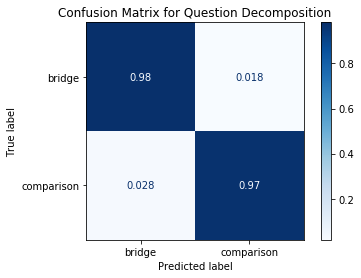

In [288]:
cat_truth = []
cat_pred = []
onehop_count = 0
intersec_count = 0
intersec_bridge = 0
count = len(top6_orig)
for i in range(len(top6_orig)):
    out = final_scores_top6['answer'][top6_orig[i]['_id']]
    reason = out[1]
    answer = out[0]
    ground_truth_answer = top6_orig[i]['answer']
    ground_truth_reasoning = top6_orig[i]['type']
    large_bar_f1[reason]['Top6'].append(f1(answer,ground_truth_answer))
    large_bar_em[reason]['Top6'].append(em(answer,ground_truth_answer))
    if reason == 'onehop':
        onehop_count += 1
    else:
        cat_truth.append(ground_truth_reasoning)
        if reason == 'intersec':
            cat_pred.append('bridge')
            intersec_count += 1
            if ground_truth_reasoning == 'bridge':
                intersec_bridge += 1
            
        else:
            cat_pred.append(reason)

print("Percent of Questions predicted One Hop: {:.2f}".format(onehop_count * 100 / count))
print("Percent of Intersec Questions that are Bridge: {:.2f}".format(intersec_bridge * 100 / intersec_count))
conf = confusion_matrix(cat_truth, cat_pred, normalize = 'true')
disp = ConfusionMatrixDisplay(conf, ['bridge', 'comparison'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Question Decomposition')
plt.show()

## Bar graph results per question type per context count

comparison
Orig
All
Top1
Top3
Top6
[63.14132358857739, 63.14132358857739, 63.14132358857739, 63.14132358857739, 63.14132358857739]
onehop
Orig
All
Top1
Top3
Top6
[66.73720983430856, 49.10852024777472, 54.91631489104819, 55.29820751365466, 51.870280369956824]
bridge
Orig
All
Top1
Top3
Top6
[75.41764933111313, 64.60976498392695, 67.50840361107663, 68.05847324111825, 66.02055658446378]
intersec
Orig
All
Top1
Top3
Top6
[72.96423768623927, 57.73331678888213, 65.8539555867949, 64.81213755194119, 61.50328269516461]


/usr/local/anaconda3/envs/multihop/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


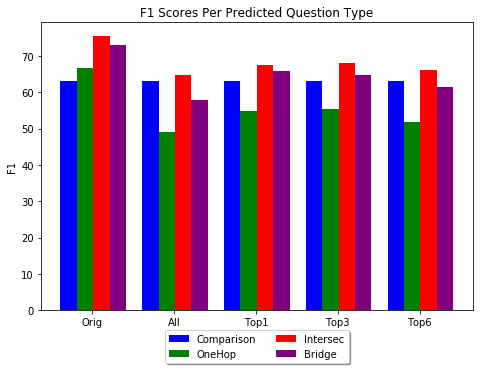

In [291]:
final_bar_f1 = []

labels = ('Orig', 'All', 'Top1', 'Top3', 'Top6')

for qtype, v in large_bar_f1.items():
    print(qtype)
    score_out = []
    for context_count, scores in v.items():
        print(context_count)
        score_out.append(100 * np.mean(scores))
    print(score_out)
    final_bar_f1.append(score_out)
        
        
X = np.arange(5)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
all_bar = ax.bar(X + 0.00, final_bar_f1[0], color = 'b', width = 0.2)
t1_bar = ax.bar(X + 0.2, final_bar_f1[1], color = 'g', width = 0.2)
t3_bar = ax.bar(X + 0.4, final_bar_f1[2], color = 'r', width = 0.2)
t6_bar = ax.bar(X + 0.6, final_bar_f1[3], color = 'purple', width = 0.2)

ax.set_ylabel('F1')
ax.set_xticks(X + 0.29)
ax.set_title('F1 Scores Per Predicted Question Type')
ax.set_xticklabels(labels)
ax.legend( (all_bar[0], t1_bar[0], t3_bar[0], t6_bar[0]), labels=('Comparison', 'OneHop', 'Intersec', 'Bridge') ,loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)

plt.show()

comparison
Orig
All
Top1
Top3
Top6
[52.168112074716475, 52.168112074716475, 52.168112074716475, 52.168112074716475, 52.168112074716475]
onehop
Orig
All
Top1
Top3
Top6
[50.91249415067852, 36.07350096711799, 41.71813587871982, 41.6260162601626, 38.6673397274104]
bridge
Orig
All
Top1
Top3
Top6
[60.1593625498008, 50.63948840927258, 52.866690116074565, 53.34307636097917, 51.517509727626454]
intersec
Orig
All
Top1
Top3
Top6
[55.6791104050834, 43.11377245508982, 49.297971918876755, 48.6404833836858, 46.19926199261993]


/usr/local/anaconda3/envs/multihop/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


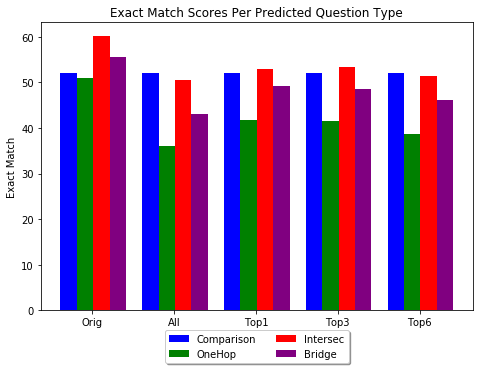

In [292]:
final_bar_em = []

for qtype, v in large_bar_em.items():
    print(qtype)
    score_out = []
    for context_count, scores in v.items():
        print(context_count)
        score_out.append(100 * np.mean(scores))
    print(score_out)
    final_bar_em.append(score_out)

X = np.arange(5)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
all_bar = ax.bar(X + 0.00, final_bar_em[0], color = 'b', width = 0.2)
t1_bar = ax.bar(X + 0.2, final_bar_em[1], color = 'g', width = 0.2)
t3_bar = ax.bar(X + 0.4, final_bar_em[2], color = 'r', width = 0.2)
t6_bar = ax.bar(X + 0.6, final_bar_em[3], color = 'purple', width = 0.2)

ax.set_ylabel('Exact Match')
ax.set_xticks(X + 0.29)
ax.set_title('Exact Match Scores Per Predicted Question Type')
ax.set_xticklabels(labels)
ax.legend( (all_bar[0], t1_bar[0], t3_bar[0], t6_bar[0]), labels=('Comparison', 'OneHop', 'Intersec', 'Bridge') ,loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)

plt.show()